In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import streamlit as st

In [2]:
model = load_model('Stock Predictions Model.Keras')

In [3]:
# Input Stock Symbol (Google by default)
stock = st.text_input('Enter Stock Synmbol', 'GOOG')

2023-11-19 02:37:05.570 
  command:

    streamlit run C:\Users\enaba\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [4]:
# Get today's date
today = datetime.date.today()

# Calculate yesterday's date
yesterday = today - datetime.timedelta(days=1)

# Format yesterday's date as a string
end = yesterday.strftime('%Y-%m-%d')

# Print or use 'end' as needed
print("Yesterday's date:", end)

Yesterday's date: 2023-11-18


In [5]:
start = '2012-01-01'
end = yesterday.strftime('%Y-%m-%d')

In [6]:
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
st.subheader('Stock Data')
st.write(data)

In [8]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [9]:
scaler =  MinMaxScaler(feature_range = (0,1))


In [10]:
# Test Data Set
past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test], ignore_index = True)
data_test_scale = scaler.fit_transform(data_test)

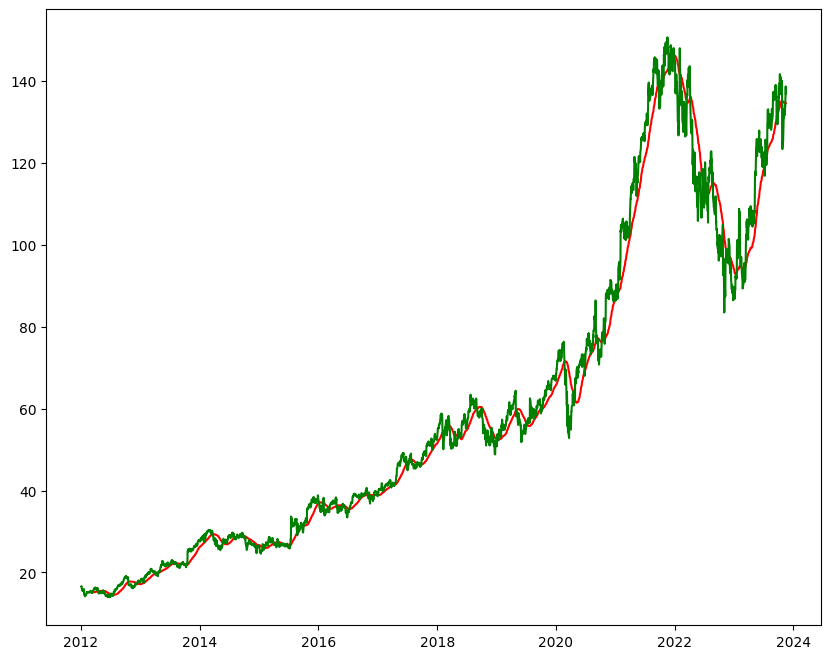

DeltaGenerator()

In [11]:
st.subheader('50 day Moving Averages ')
MA_50_days = data.Close.rolling(50).mean()
fig1 = plt.figure(figsize = (10, 8))
plt.plot(MA_50_days, 'r')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig1)

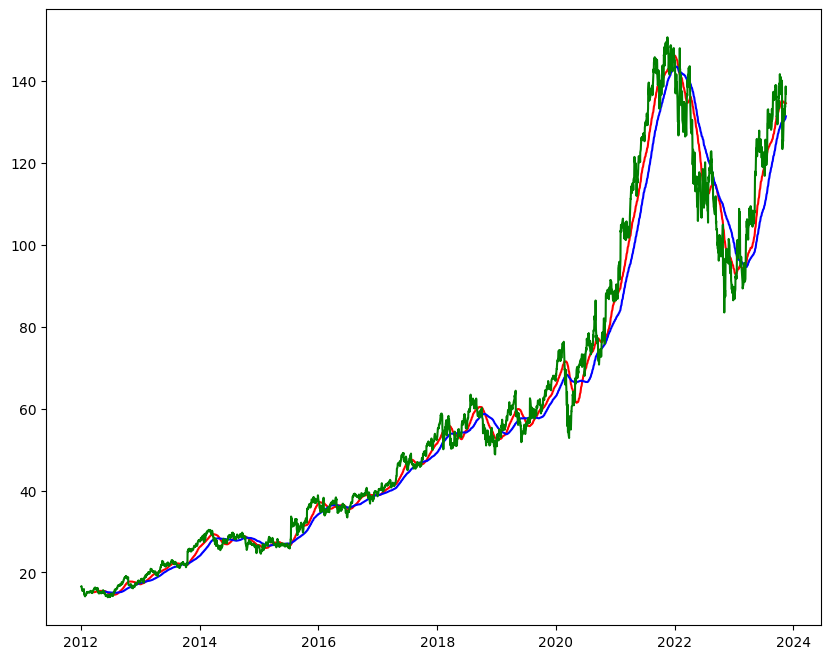

DeltaGenerator()

In [12]:
st.subheader('50 v 100 day Moving Averages ')
MA_100_days = data.Close.rolling(100).mean()
fig2 = plt.figure(figsize = (10, 8))
plt.plot(MA_50_days, 'r', label = '50 day MA')
plt.plot(MA_100_days, 'b', label = '100 day MA')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig2)

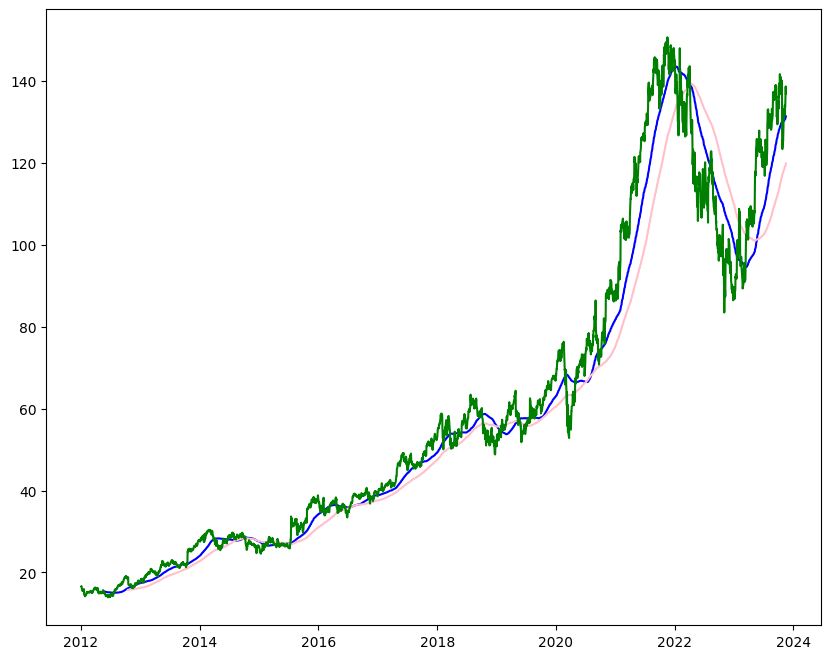

DeltaGenerator()

In [13]:
st.subheader('100 v 200 day Moving Averages ')
MA_200_days = data.Close.rolling(200).mean()
fig3 = plt.figure(figsize = (10, 8))
plt.plot(MA_100_days, 'b', label = '100 day MA')
plt.plot(MA_200_days, 'pink', label = '200 day MA')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig3)

In [14]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    
x, y =np.array(x),np.array(y)

In [15]:
predict = model.predict(x)

19/19 [==============================] - 2s 45ms/step


In [16]:
scale = 1/scaler.scale_
predict = predict * scale
y= y* scale

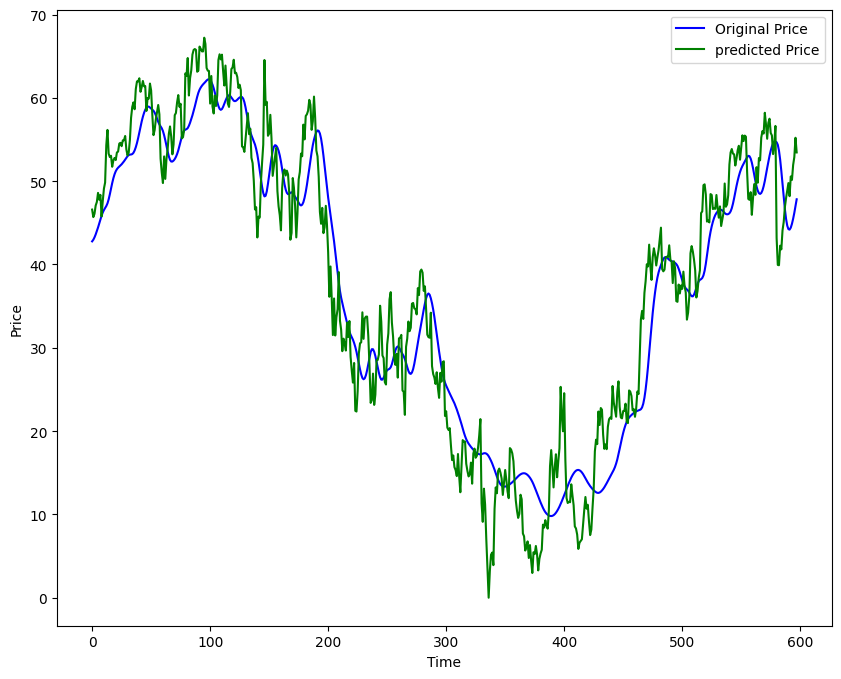

DeltaGenerator()

In [17]:
st.subheader('Original Price vs Predicted Price')
fig4 = plt.figure(figsize = (10, 8))
plt.plot(predict,'b', label = 'Original Price')
plt.plot( y, 'g', label = 'predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
st.pyplot(fig4)


In [ ]:
!streamlit run ap